### <strong><font color=cornflowerblue>第一次作品：主成分分析應用於群組資料之探討</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：


<hr>

#### <strong><font color=indianred>載入套件</font></strong>：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<hr>

#### 第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

##### (1) 匯入與觀察資料

In [2]:
# 路徑
path = r"C:\Users\Sheng\Documents\NTPU_Bachelor\Year_4\Y4_Sem_2\ShallowML\ClassData"
# 讀取資料
df_wine = pd.read_excel(path + r'\Wine.xlsx')
df_wine.head()
# 取出反應變數 y
y = df_wine.iloc[:, -1].values
# 移除最後一欄
df_wine1 = df_wine.iloc[:, :-1]

# 顯示資料特性
# df.info()
print('【樣本數】：', df_wine1.shape[0])
print('【欄位數】：', df_wine1.shape[1])
display(df_wine1.head())

【樣本數】： 178
【欄位數】： 13


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

##### (2) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

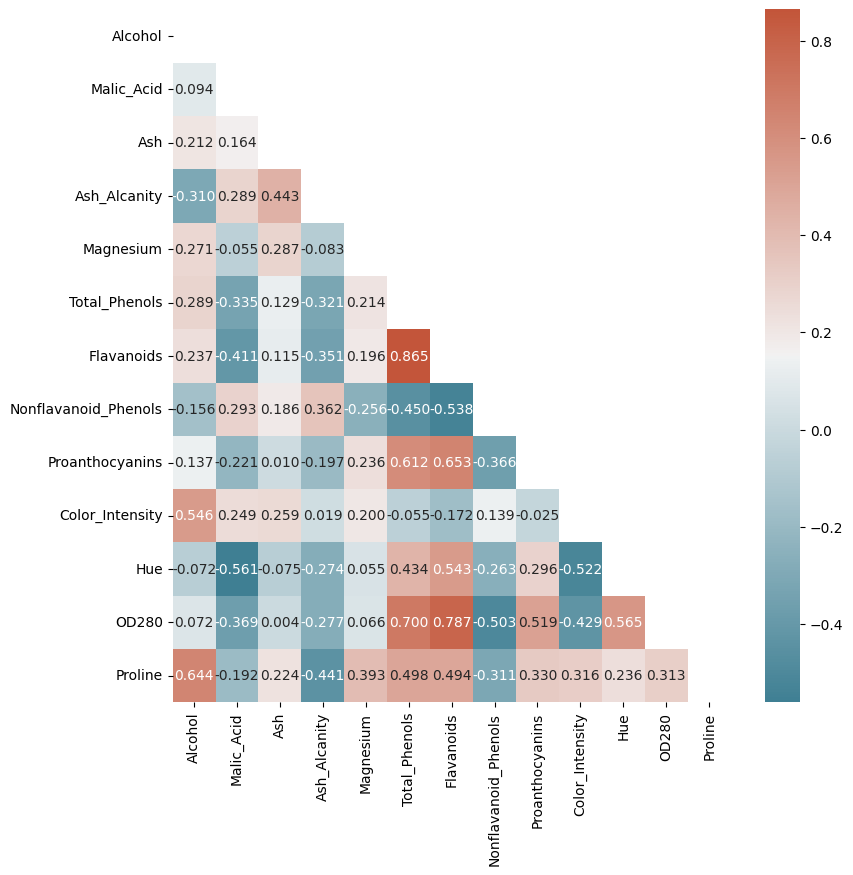

In [3]:
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
# 計算相關係數
R = df_wine1.corr()
# np.ones_like(R, dtype = bool): 生成一個和 R 一樣大小的矩陣，元素全為 True
# np.triu(): 上三角矩陣（np.tril 則是下三角矩陣）
mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask 
# annot = True: 在 heatmap 上標註相關係數
# mask: 隱藏上三角（或下三角）
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(R, annot = True, mask = mask, cmap = cmap, fmt = ".3f")
plt.show()

<hr>

##### (3) 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

In [4]:
columns = df_wine1.columns
scaler = StandardScaler()  # create a StandardScaler object
X_std = scaler.fit_transform(df_wine1)  # standardize the data
df_X_std = pd.DataFrame(X_std, columns=columns)

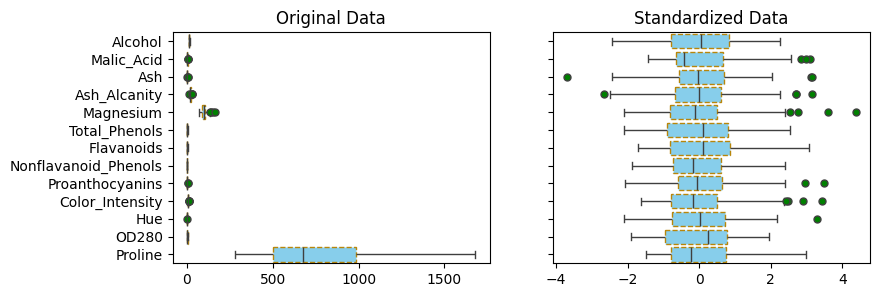

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
boxprops = dict(linestyle='--', linewidth=1, facecolor='skyblue', edgecolor='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='g', markersize=5, linestyle='none')

sns.boxplot(data=df_wine1, ax=ax[0], orient='h', boxprops=boxprops, flierprops=flierprops)
ax[0].set_title('Original Data')

sns.boxplot(data=df_X_std, ax=ax[1], orient='h', boxprops=boxprops, flierprops=flierprops)
ax[1].set_title('Standardized Data')

plt.show()

<hr>

##### (4) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

In [6]:
# PCA
# 未標準化的資料
pca = PCA()  # create a PCA object
X_pca = pca.fit(df_wine1)  # apply PCA to the standardized data
Z = pca.transform(df_wine1)  # get the new data matrix Z
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# 標準化後的資料
pca_std = PCA()  # create a PCA object
X_pca_std = pca_std.fit(X_std)  # apply PCA to the standardized data
Z_std = pca_std.transform(X_std)  # get the new data matrix Z
eigenvalues_std = pca_std.explained_variance_
eigenvectors_std = pca_std.components_

print('【未標準化】：')
print('【主成分特徵】：', Z.shape)

print('【標準化】：')
print('【主成分特徵】：', Z_std.shape)

【未標準化】：
【主成分特徵】： (178, 13)
【標準化】：
【主成分特徵】： (178, 13)


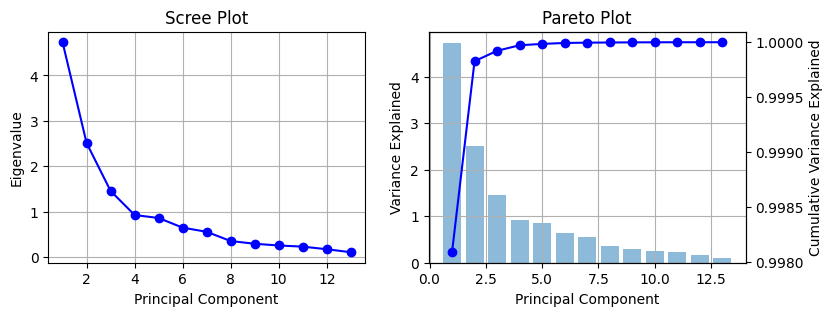

In [7]:
# 畫出 scree plot 和 pareto plot
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Scree Plot
ax[0].plot(range(1, len(eigenvalues_std) + 1), eigenvalues_std, 'bo-')
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)

# Pareto Plot
ax2 = ax[1].twinx()  # 創建共享 x 軸的第二個 y 軸

ax[1].bar(range(1, len(eigenvalues_std) + 1), eigenvalues_std, alpha=0.5, align='center', label='Individual explained variance')
ax[1].set_title('Pareto Plot')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')
ax[1].grid(True)

# 畫出累積解釋變異量，用百分比表示
ax2.plot(range(1, len(eigenvalues_std) + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
ax2.set_ylabel('Cumulative Variance Explained')

plt.show()

<hr>

##### (5) 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

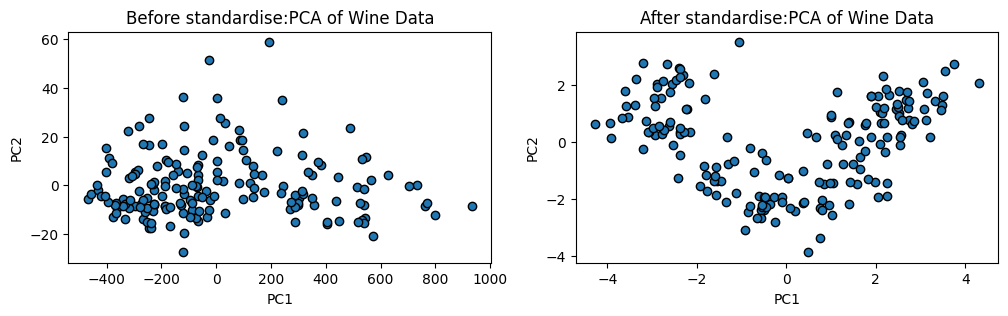

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].scatter(Z[:, 0], Z[:, 1], edgecolors='k')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Before standardise:PCA of Wine Data')

ax[1].scatter(Z_std[:, 0], Z_std[:, 1], edgecolors='k')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('After standardise:PCA of Wine Data')

plt.show()

<hr>

##### (6) 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

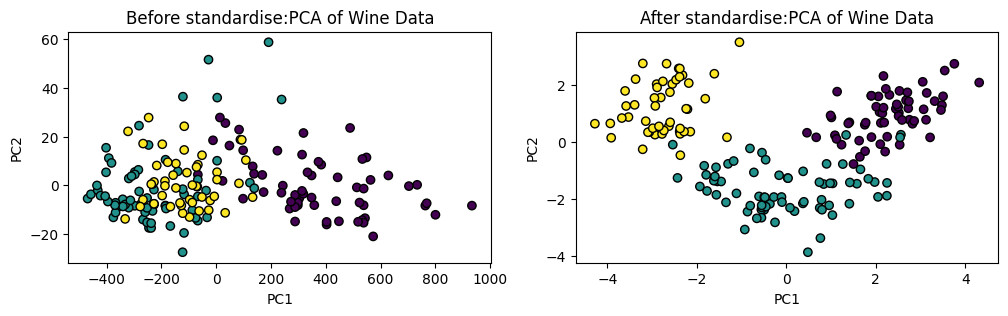

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].scatter(Z[:, 0], Z[:, 1], c=y, edgecolors='k', cmap = 'viridis')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Before standardise:PCA of Wine Data')

ax[1].scatter(Z_std[:, 0], Z_std[:, 1], c=y, edgecolors='k', cmap = 'viridis')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('After standardise:PCA of Wine Data')

plt.show()

<hr>

##### (7) 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

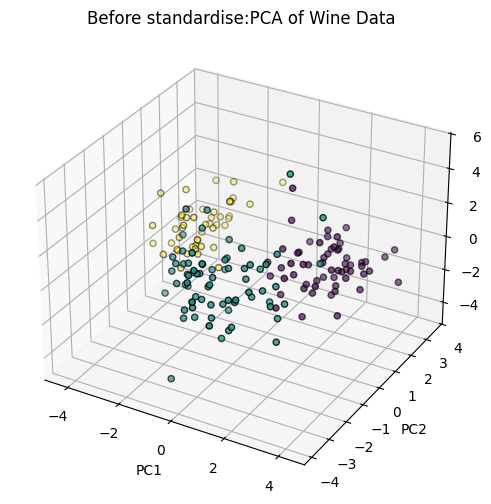

In [10]:
# 改畫立體圖，要利用三個主成分
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_std[:, 0], Z_std[:, 1], Z_std[:, 2], c=y, edgecolors='k', cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Before standardise:PCA of Wine Data')
plt.show()

<hr>

##### (8) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。（譬如可以畫 eigenvectors 與變數對應的 heatmap）。

原始資料 X_std：
$$
X_{std} = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{pmatrix}
\quad \text{,} \quad m = \text{178}, \, n = \text{13}
$$

$$
Z_1 = v_{11}x_{11} + v_{12}x_{12} + \cdots + v_{1n}x_{1n} \\
\vdots \\
Z_{13} = v_{m1}x_{m1} + v_{12}x_{12} + \cdots + v_{113}x_{113}
$$

eigenvector = 

In [11]:
eigenvectors_df = pd.DataFrame(eigenvectors_std[:2], columns = df_wine1.columns, index = ['PC1', 'PC2'])
eigenvectors_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903


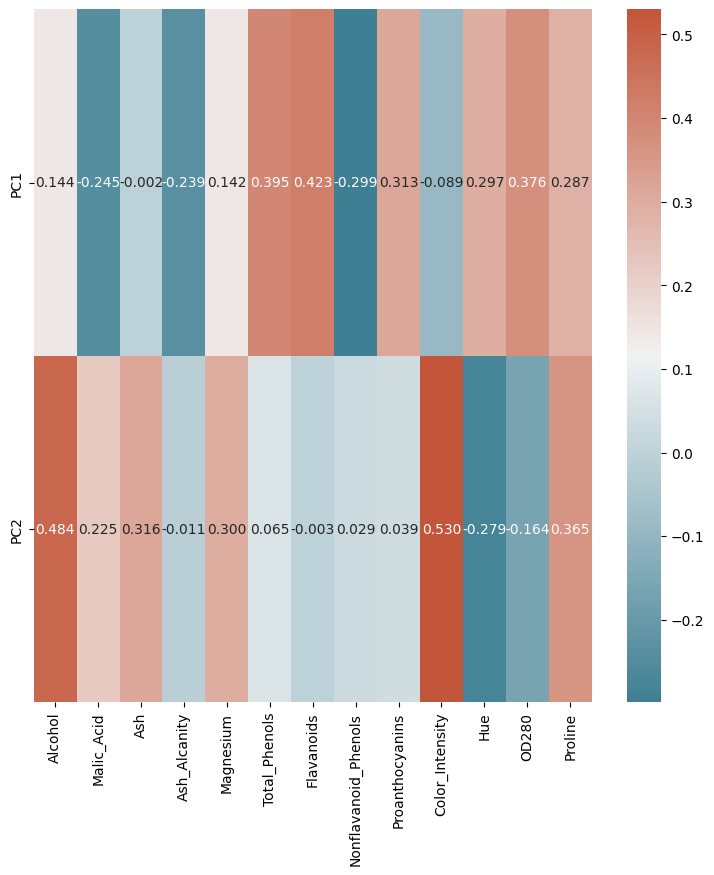

In [12]:
plt.figure(figsize = (9, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(eigenvectors_df, annot = True, cmap = cmap, fmt = ".3f")
# plt.xlabel('Feature')
# plt.ylabel('Principal Component')
plt.show()

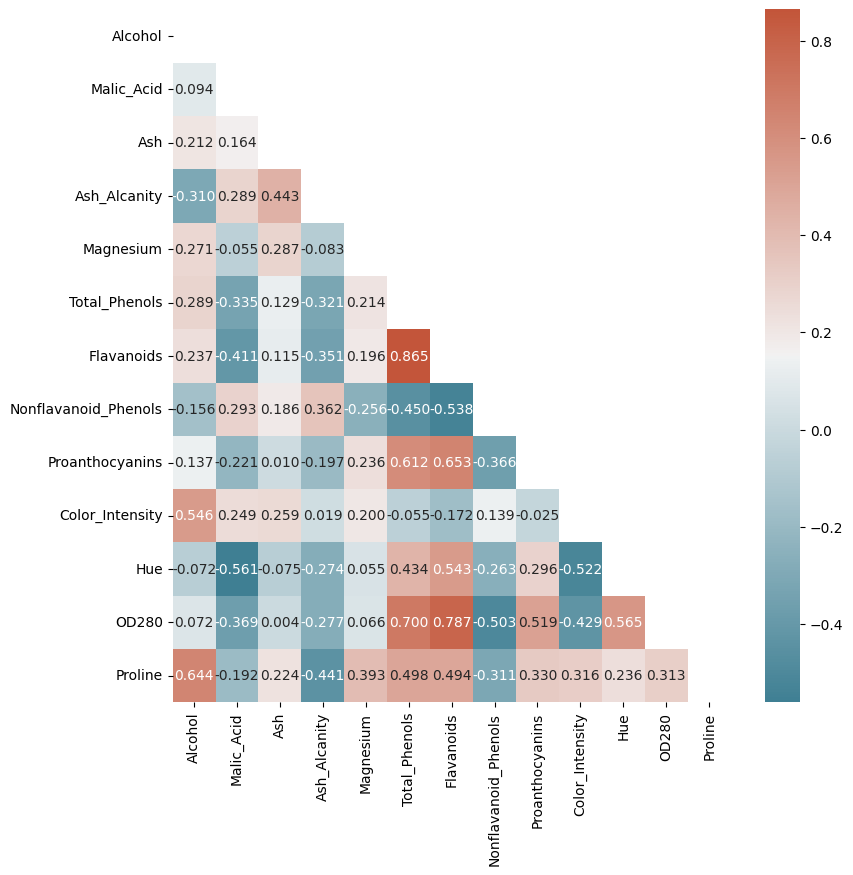

In [13]:
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
# 計算相關係數
R = df_wine1.corr()
# np.ones_like(R, dtype = bool): 生成一個和 R 一樣大小的矩陣，元素全為 True
# np.triu(): 上三角矩陣（np.tril 則是下三角矩陣）
mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask 
# annot = True: 在 heatmap 上標註相關係數
# mask: 隱藏上三角（或下三角）
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(R, annot = True, mask = mask, cmap = cmap, fmt = ".3f")
plt.show()